In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import xarray as xr
import pandas as pd
import csv
import subprocess
import os
import sage_data_client
import urllib
import tempfile
from xmovie import Movie


%matplotlib inline

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:23: UserWarning: Optional dependency `tqdm` not found. This will make progressbars a lot nicer.     Install with `conda install -c conda-forge tqdm`
  Install with `conda install -c conda-forge tqdm`"


In [222]:
df = xr.open_mfdataset('/Users/scollis/data/xsageT2/sage_mobotix_radiancetemps_202204*')

In [223]:
df

,Array,Chunk
Bytes,1.83 GB,677.38 kB
Shape,"(2706, 252, 336)","(1, 252, 336)"
Count,8118 Tasks,2706 Chunks
Type,float64,numpy.ndarray


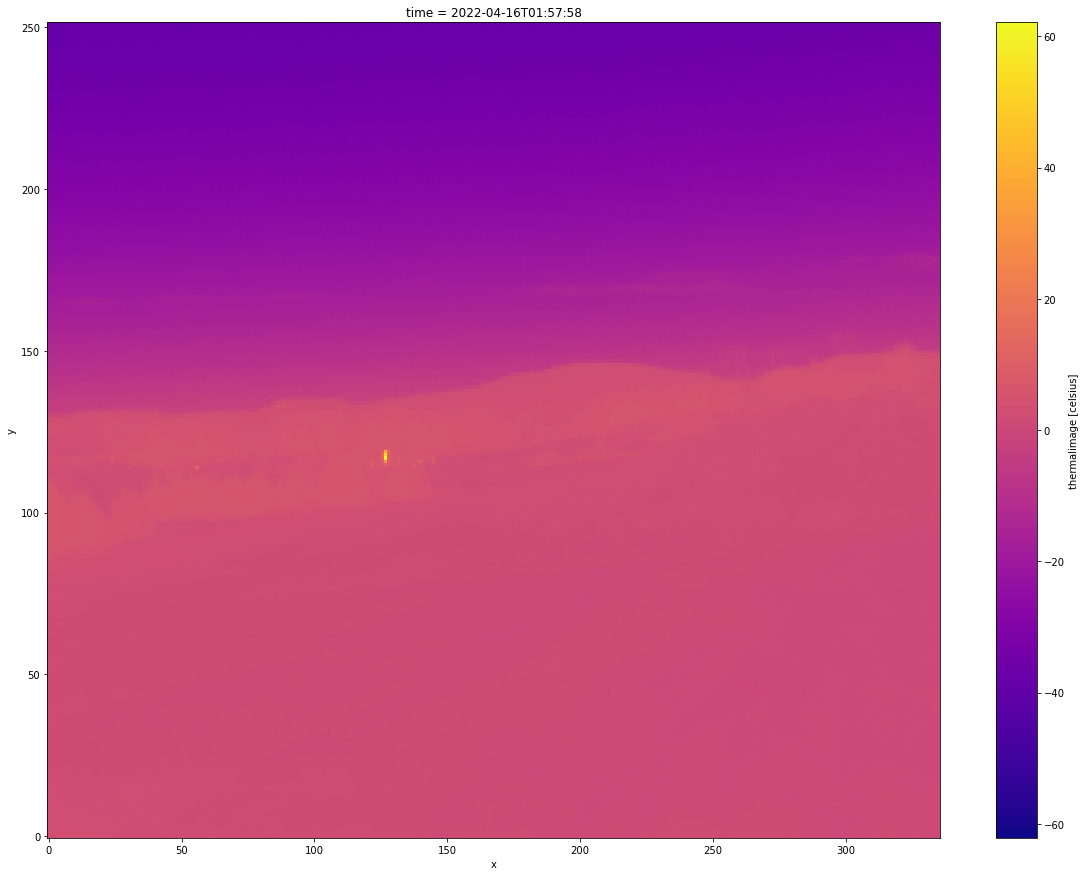

In [250]:
my_fig = plt.figure(figsize=[20,15])
df.thermalimage.sel(time='2022-04-16 02:00:00', method='nearest').plot(cmap='plasma')

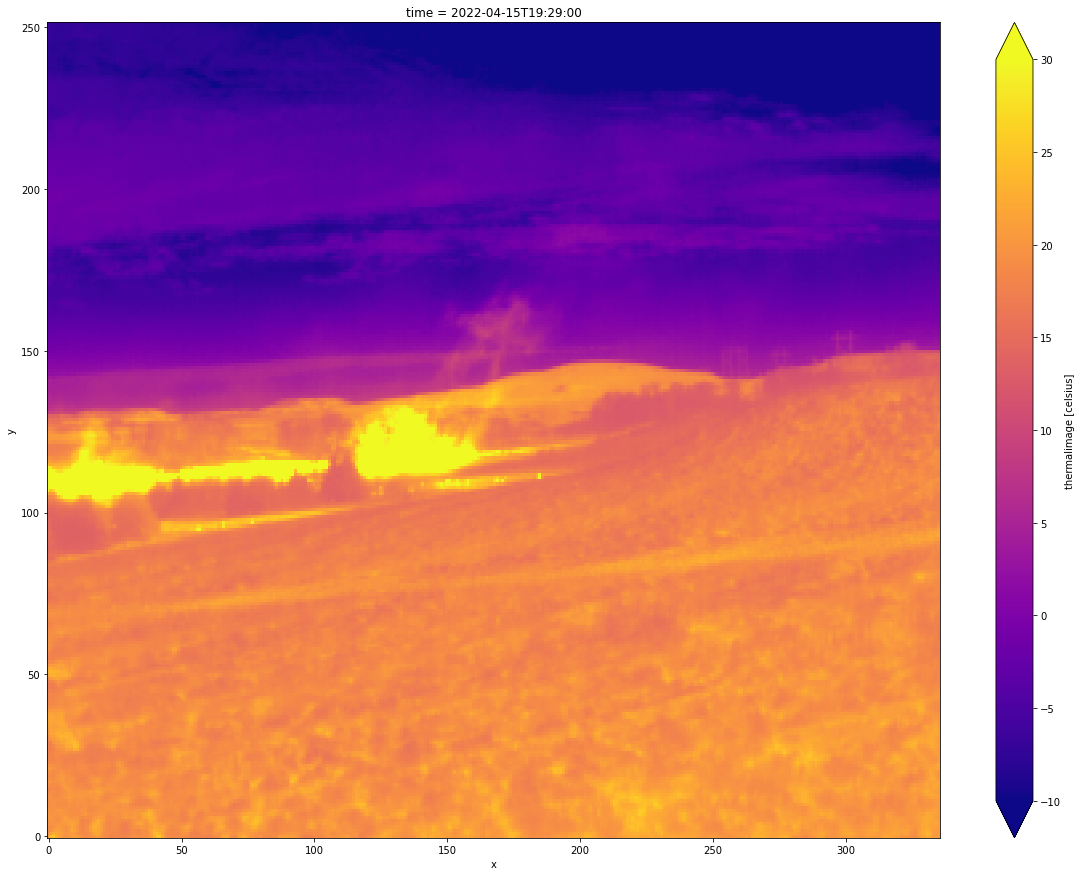

In [270]:
my_fig = plt.figure(figsize=[20,15])
df.thermalimage.sel(time='2022-04-15 19:28:00', method='nearest').plot(cmap='plasma', vmin=-10, vmax=30)

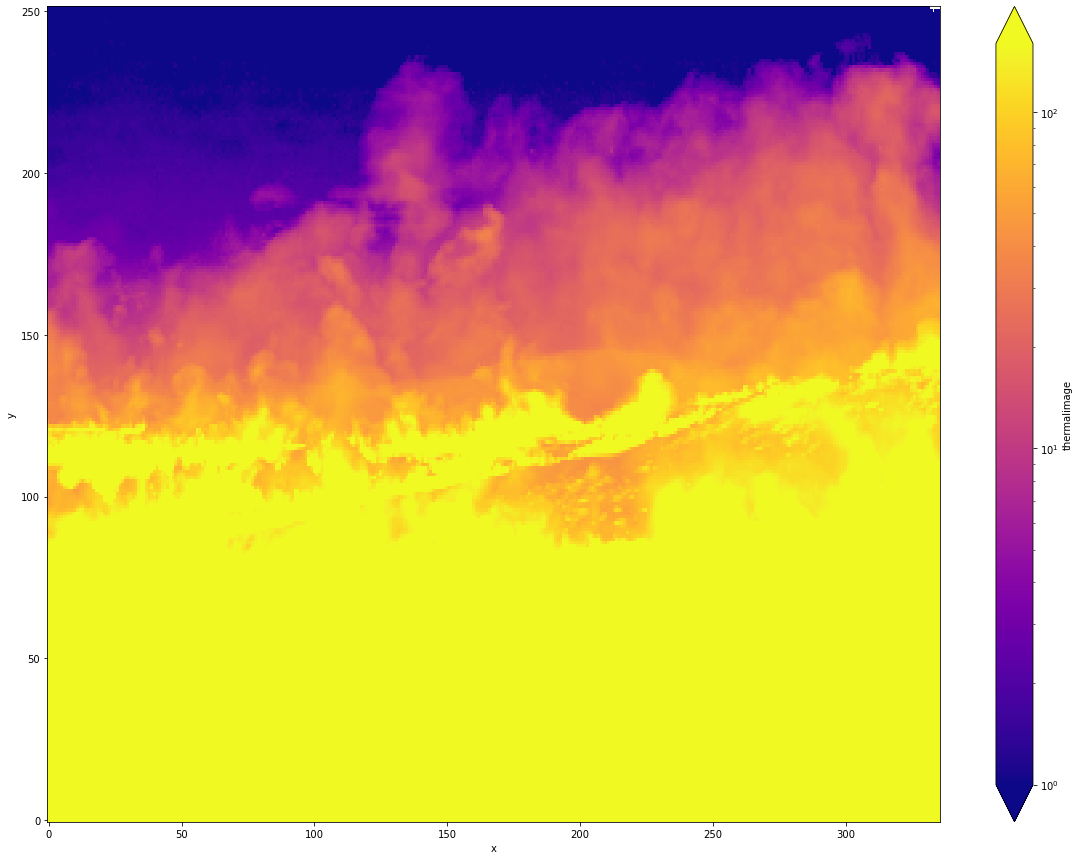

In [271]:
my_fig = plt.figure(figsize=[20,15])
df.thermalimage.sel(time=slice('2022-04-15 12:00', '2022-04-16 01:55')).max(dim='time').plot(cmap='plasma', vmin=1, 
                                     norm=colors.LogNorm(vmin=1, vmax=160))

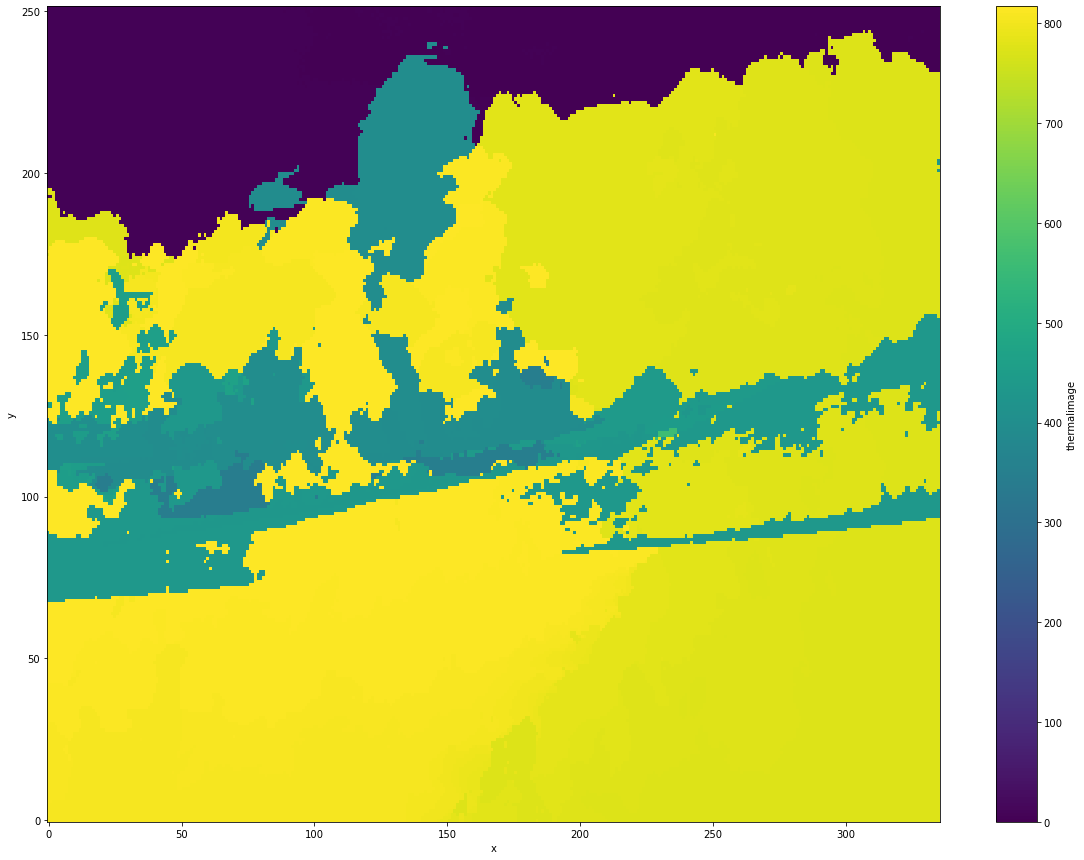

In [275]:
my_fig = plt.figure(figsize=[20,15])
df.thermalimage.sel(time=slice('2022-04-15 12:00', '2022-04-16 01:55')).argmax(dim='time').plot()

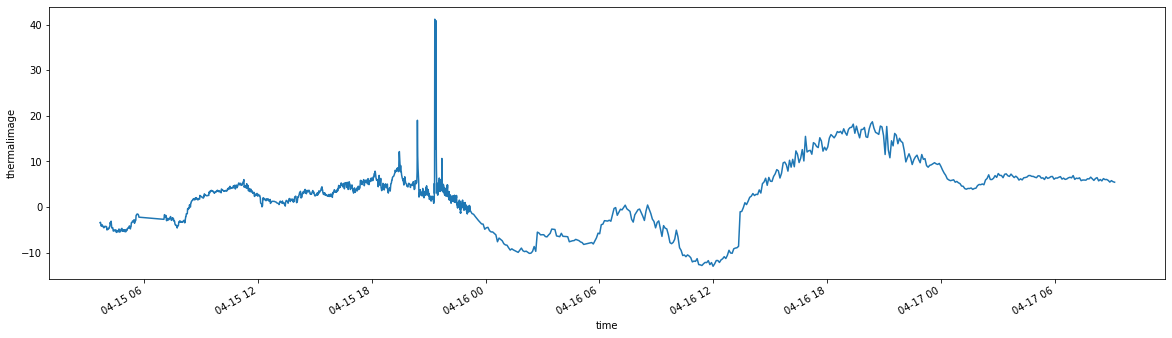

In [276]:
my_fig = plt.figure(figsize=[20,5])
df.thermalimage.mean(dim='x').mean(dim='y').plot()

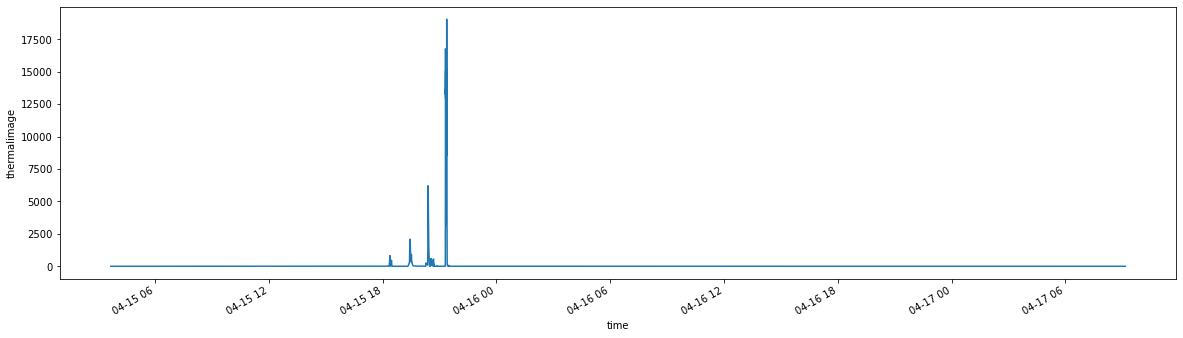

In [277]:
my_fig = plt.figure(figsize=[20,5])
df.thermalimage.where(df.thermalimage > 60).count(dim=['x','y']).plot()

In [3]:
dfaq = sage_data_client.query(
    start="2022-04-14", end="2022-04-18",
    filter={
        "name": "env.air_quality.conc",
        'vsn' : 'W038'
    }
)

In [3]:
dfaq

,timestamp,name,value,meta.host,meta.job,meta.node,meta.plugin,meta.sensor,meta.task,meta.vsn
0,2022-04-14 19:28:39.728038494+00:00,env.air_quality.conc,0.001,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038
1,2022-04-14 19:28:41.521791138+00:00,env.air_quality.conc,0.001,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038
2,2022-04-14 19:28:42.521725577+00:00,env.air_quality.conc,0.001,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038
3,2022-04-14 19:28:43.521835067+00:00,env.air_quality.conc,0.001,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038
4,2022-04-14 19:28:44.521580743+00:00,env.air_quality.conc,0.001,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038
...,...,...,...,...,...,...,...,...,...,...
319034,2022-04-18 21:28:33.867244252+00:00,env.air_quality.conc,0.002,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038
319035,2022-04-18 21:28:34.867134332+00:00,env.air_quality.conc,0.002,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038
319036,2022-04-18 21:28:35.866947567+00:00,env.air_quality.conc,0.002,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038
319037,2022-04-18 21:28:37.036068578+00:00,env.air_quality.conc,0.002,000048b02d15c332.ws-nxcore,sage,000048b02d15c332,air-quality:0.2.0,es642,air-quality,W038


In [4]:
dfaq['timestamp'] = pd.to_datetime(dfaq['timestamp'])
dfaq = dfaq.set_index('timestamp')

Text(0, 0.5, 'PM2.5 mg/m$^3$')

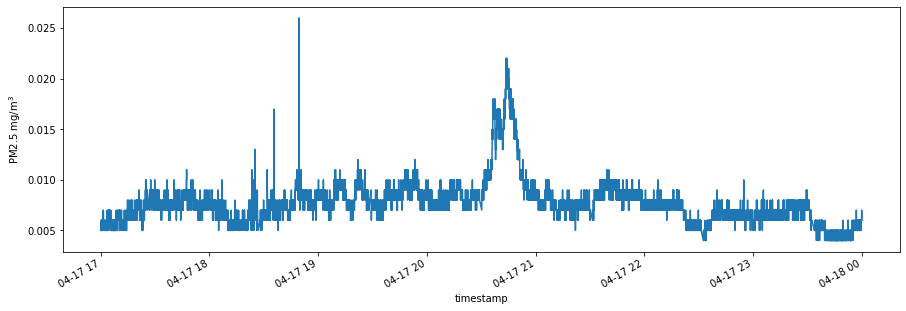

In [7]:
my_fig = plt.figure(figsize=[15,5])
dfaq.value["2022-04-17 17:00":"2022-04-18 23:55"].plot()
plt.ylabel('PM2.5 mg/m$^3$')

Text(0, 0.5, 'PM2.5 mg/m$^3$')

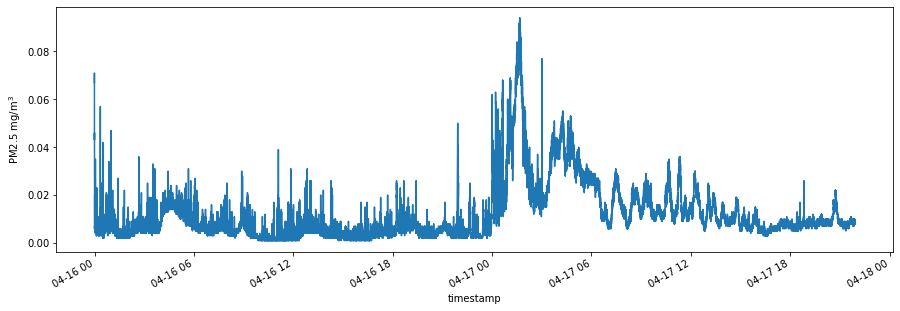

In [8]:
my_fig = plt.figure(figsize=[15,5])
dfaq.value["2022-04-15 23:59":"2022-04-17 21:55"].plot()
plt.ylabel('PM2.5 mg/m$^3$')

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  


Text(0, 0.5, 'PM2.5 mg/m$^3$')

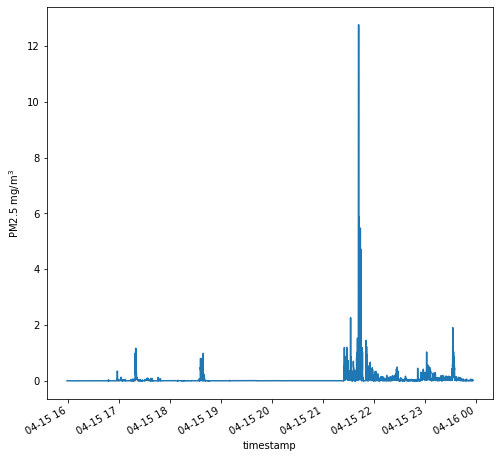

In [16]:
my_fig = plt.figure(figsize=[8,8])
ax = my_fig.add_axes()
dfaq.value["2022-04-15 15:59":"2022-04-15 23:55"].plot(ax = ax)
plt.ylabel('PM2.5 mg/m$^3$')

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  


Text(0, 0.5, 'PM2.5 mg/m$^3$')

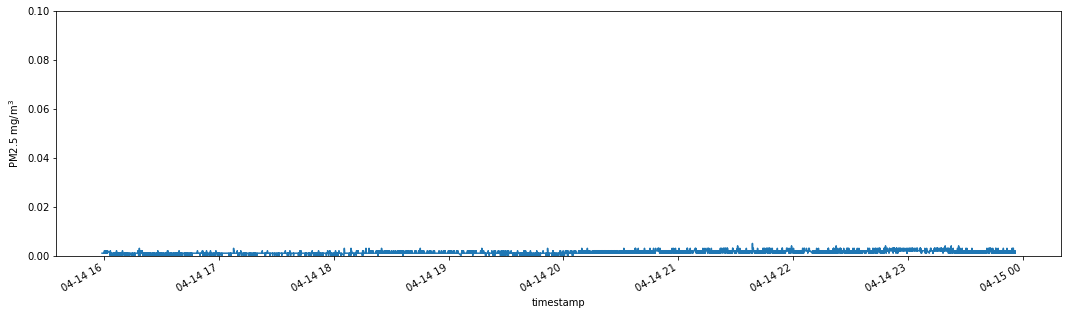

In [18]:
my_fig = plt.figure(figsize=[18,5])
ax = my_fig.add_axes()
dfaq.value["2022-04-14 15:59":"2022-04-14 23:55"].plot(ax = ax)
plt.ylim(0,0.1)
plt.ylabel('PM2.5 mg/m$^3$')

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  


Text(0, 0.5, 'PM2.5 mg/m$^3$')

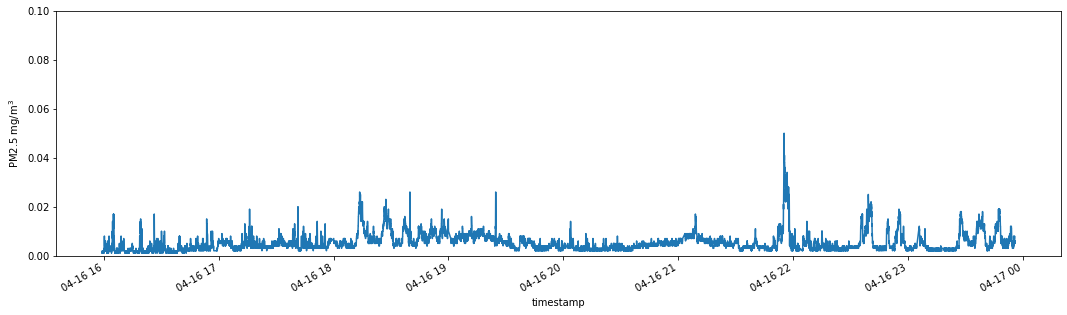

In [19]:
my_fig = plt.figure(figsize=[18,5])
ax = my_fig.add_axes()
dfaq.value["2022-04-16 15:59":"2022-04-16 23:55"].plot(ax = ax)
plt.ylim(0,0.1)
plt.ylabel('PM2.5 mg/m$^3$')

(array(19097.70833333), array(19097.91666667))

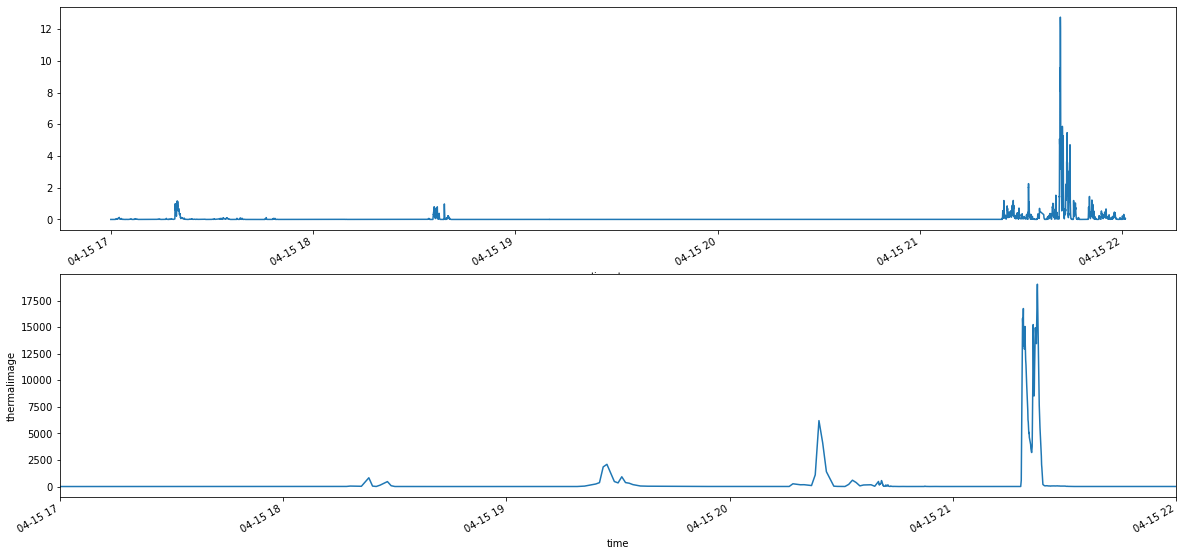

In [286]:
#my_fig = plt.figure()
plts = plt.subplots(nrows=2,figsize=[20,10])
dfaq.value["2022-04-15 17:00":"2022-04-15 22:00"].plot(ax=plts[1][0])
#plt.xlim(["2022-04-15 17:00","2022-04-15 22:00"])
plt.ylabel('PM2.5 mg/m$^3$')
df.thermalimage.where(df.thermalimage > 60).count(dim=['x','y']).plot(ax=plts[1][1])
plt.xlim(["2022-04-15 17:00","2022-04-15 22:00"])

In [158]:
def custom_plotfunc(ds, fig, tt, *args, **kwargs):
    ds.isel(time=tt).plot(cmap='plasma', vmin=-5, vmax=100)
    
    return None, None



In [187]:
df.thermalimage.sel(time=slice('2022-04-15 20:00', '2022-04-15 23:55'))

,Array,Chunk
Bytes,1.01 GB,677.38 kB
Shape,"(1492, 252, 336)","(1, 252, 336)"
Count,8917 Tasks,1492 Chunks
Type,float64,numpy.ndarray


In [188]:
mov = Movie(df.thermalimage.sel(time=slice('2022-04-15 20:00', '2022-04-15 23:55')).chunk({'time':1}), custom_plotfunc)

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:48: UserWarning: No `vmin` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmin` to avoid this step
  UserWarning,
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:55: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  UserWarning,


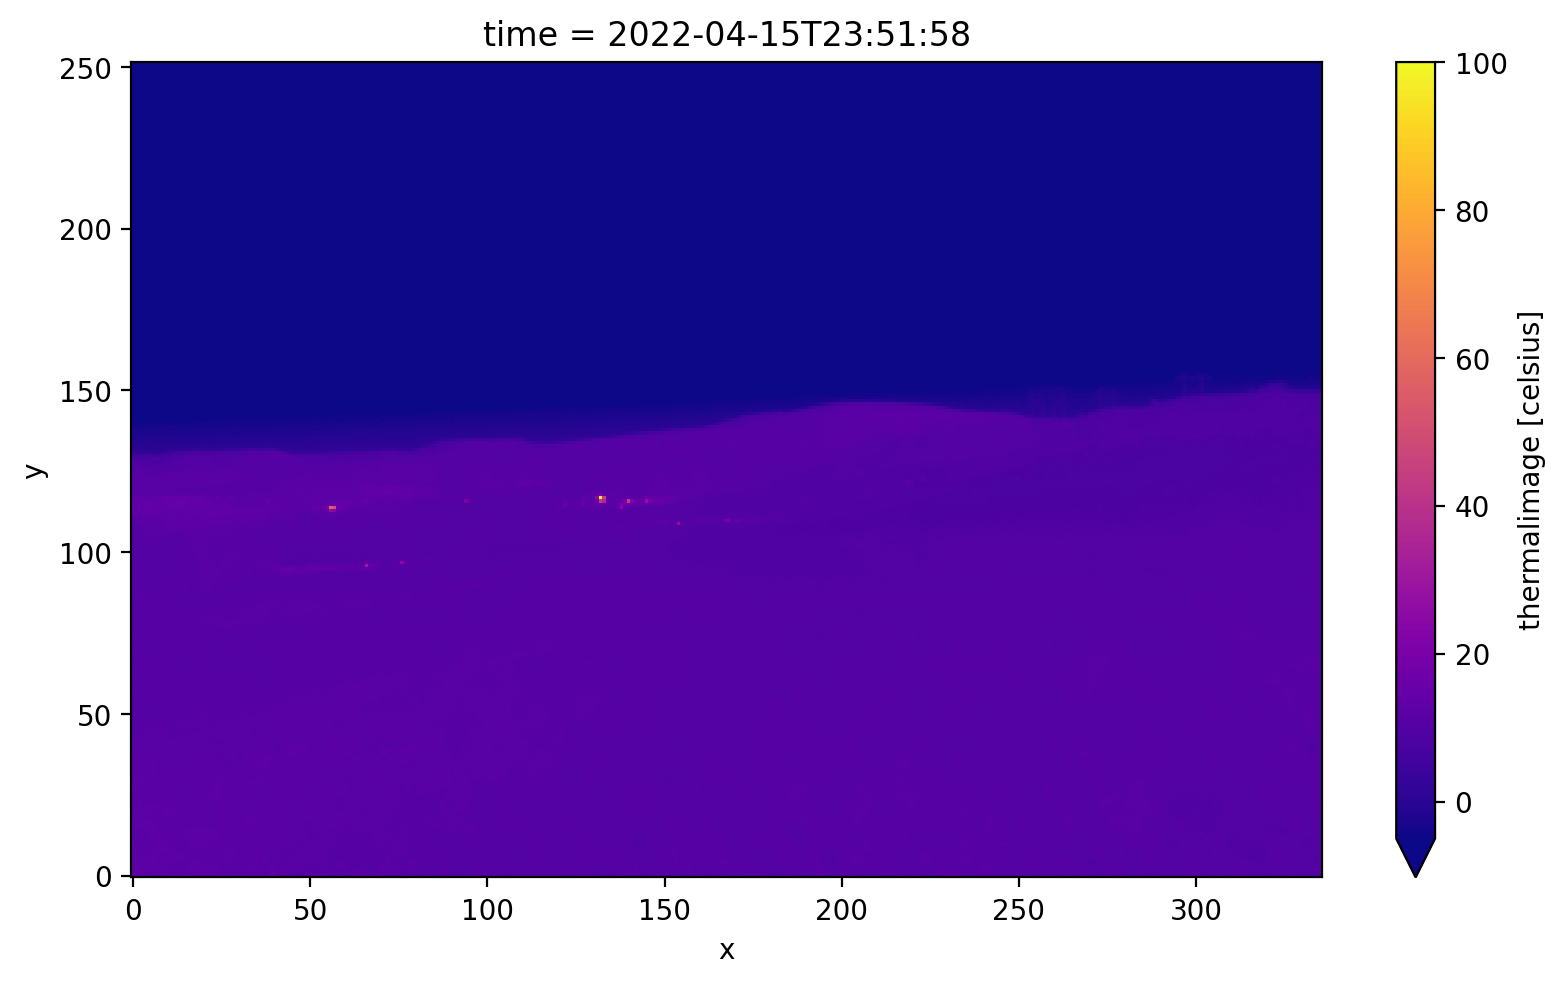

In [190]:
mov.preview(-1)

In [191]:
mov.save('movie.mp4', framerate = 5,
         overwrite_existing=True, 
         ffmpeg_options='-c:v libx264 -preset veryslow -crf 10 -pix_fmt yuv420p',
         parallel=True,
         parallel_compute_kwargs=dict(scheduler="processes", num_workers=16))

#mov.save(
#    'movie_parallel.mov',
#    parallel=True,
#    overwrite_existing=True,
#    gif_resolution_factor=2.0,
#    parallel_compute_kwargs=dict(scheduler="processes", num_workers=16)
#)
#.chunk({'time':1})

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:23: UserWarning: Optional dependency `tqdm` not found. This will make progressbars a lot nicer.     Install with `conda install -c conda-forge tqdm`
  Install with `conda install -c conda-forge tqdm`"
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:23: UserWarning: Optional dependency `tqdm` not found. This will make progressbars a lot nicer.     Install with `conda install -c conda-forge tqdm`
  Install with `conda install -c conda-forge tqdm`"
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:23: UserWarning: Optional dependency `tqdm` not found. This will make progressbars a lot nicer.     Install with `conda install -c conda-forge tqdm`
  Install with `conda install -c conda-forge tqdm`"
/Users/scollis/miniconda3

Movie created at movie.mp4


(-0.01, 0.1)

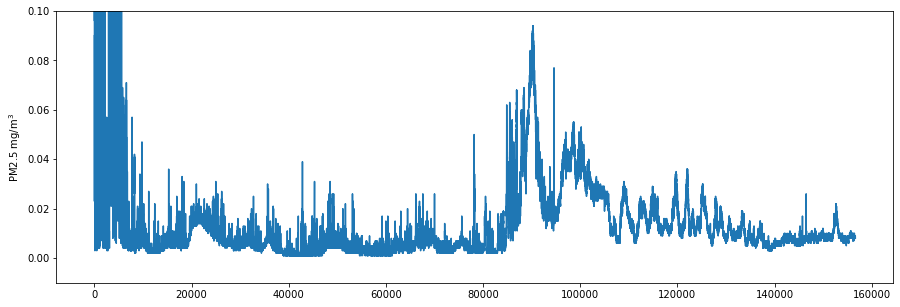

In [307]:
my_fig = plt.figure(figsize=[15,5])
dfaq.value.plot()
plt.ylabel('PM2.5 mg/m$^3$')
plt.ylim([-0.01, 0.1])

In [299]:
mov.save(
    'movie_parallel.mov',
    parallel=True,
    overwrite_existing=True,
    gif_resolution_factor=2.0,
    parallel_compute_kwargs=dict(scheduler="processes", num_workers=16)
)
.chunk({'time':1})

SyntaxError: invalid syntax (2845440301.py, line 8)

In [221]:
def custom_plotfunc_n(ds, fig, tt, *args, **kwargs):
    ds.isel(time=tt).plot(cmap='plasma', vmin=-15, vmax=35)
    
    return None, None

mov = Movie(df.thermalimage.sel(time=slice('2022-04-16 12:00', '2022-04-16 14:00')).chunk({'time':1}), 
            custom_plotfunc_n)
mov.save('fall_movie.mp4', framerate = 5,
         overwrite_existing=True, 
         ffmpeg_options='-c:v libx264 -preset veryslow -crf 10 -pix_fmt yuv420p',
         parallel=True,
         parallel_compute_kwargs=dict(scheduler="processes", num_workers=16))


/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:48: UserWarning: No `vmin` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmin` to avoid this step
  UserWarning,
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:55: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  UserWarning,
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab4-py3.7.egg/xmovie/core.py:23: UserWarning: Optional dependency `tqdm` not found. This will make progressbars a lot nicer.     Install with `conda install -c conda-forge tqdm`
  Install with `conda install -c conda-forge tqdm`"
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xmovie-0.3.2.dev2+g959eab

Movie created at fall_movie.mp4
